In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
df = pd.read_csv("train_B.csv")
df.head()

id user_age_group  gender subscription_plan  monthly_price_inr  \
0   1    middle_aged    male           student               75.0   
1   2          adult    male             basic              138.0   
2   3    young_adult    male           student              140.0   
3   4           teen    male             basic              149.0   
4   5    young_adult  female          standard              224.0   

   subscription_duration_days payment_method  num_payment_failures_90d  \
0                        1235            upi                         6   
1                         465            upi                         3   
2                        1805            upi                         8   
3                        1049     debit_card                         1   
4                         678            upi                         1   

   days_since_last_login  avg_session_duration_min  ...  \
0                     27                      20.2  ...   
1                    124                       3.6  ...   
2                     29                      68.0  ...   
3                     76                      11.8  ...   
4                    356                      49.8  ...   

   price_increase_experienced used_discount_code       device_type  \
0                       False              False       mid_android   
1                        True               True    budget_android   
2                       False              False  flagship_android   
3                        True               True    budget_android   
4                       False              False      multi_device   

   os_version_age_months  internet_speed_category  onboarding_completed  \
0                   16.0                  fast_4g                 False   
1                   27.0              moderate_3g                 False   
2                    4.0              moderate_3g                 False   
3                   11.0                  slow_2g                  True   
4                   31.0                broadband                 False   

   content_category_preference  days_since_last_feature_use  \
0                    education                         68.0   
1                entertainment                         27.0   
2                        mixed                        323.0   
3                 productivity                        360.0   
4                      fitness                        206.0   

   notification_opt_in       churn_reason  
0                 True  found_alternative  
1                False      lost_interest  
2                False  found_alternative  
3                False    price_sensitive  
4                 True      lost_interest  

[5 rows x 30 columns]

In [254]:
df.shape

(3500, 30)

### ============ Drop Irrelevent columns ==============

In [255]:
df.drop(columns=["id"], inplace=True)

### =========== Split data ==========

In [256]:
x = df.drop("churn_reason", axis = 1)
y = df["churn_reason"]

In [257]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state = 42)

In [258]:
missing_pct = x.isna().mean() * 100
missing_pct.sort_values(ascending=False)

os_version_age_months          5.342857
rating_given                   5.200000
avg_session_duration_min       5.028571
avg_ticket_resolution_hrs      4.914286
sessions_per_week              4.314286
days_since_last_feature_use    4.257143
features_used_pct              4.257143
user_age_group                 0.000000
content_category_preference    0.000000
onboarding_completed           0.000000
internet_speed_category        0.000000
device_type                    0.000000
used_discount_code             0.000000
price_increase_experienced     0.000000
competitor_app_installed       0.000000
num_referrals_made             0.000000
unresolved_tickets             0.000000
app_crash_count_30d            0.000000
gender                         0.000000
num_support_tickets_90d        0.000000
session_trend_30d              0.000000
days_since_last_login          0.000000
num_payment_failures_90d       0.000000
payment_method                 0.000000
subscription_duration_days     0.000000


In [259]:
x.isna().any(axis=1).sum()

np.int64(1031)

In [260]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(
    df["churn_reason"],
    x["os_version_age_months"].isna()
)

stat, p, dof, expected = chi2_contingency(contingency)
print(p)

x["os_version_age_months"] =x.groupby(["gender", "user_age_group"])["os_version_age_months"].transform(lambda x: x.fillna(x.median()))
# xtest["os_version_age_months"] =xtest.groupby(["gender", "user_age_group"])["os_version_age_months"].transform(lambda x: x.fillna(x.median()))

0.5820770874845511


In [261]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(
    df["churn_reason"],
    x["rating_given"].isna()
)

stat, p, dof, expected = chi2_contingency(contingency)
print(p)

x["rating_given"] = x.groupby(["user_age_group", "content_category_preference"])["rating_given"].transform(lambda x: x.fillna(x.median()))
# xtest["rating_given"] = xtest.groupby(["user_age_group", "content_category_preference"])["rating_given"].transform(lambda x: x.fillna(x.median()))

0.7380480206423368


In [262]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(
    df["churn_reason"],
    x["avg_session_duration_min"].isna()
)

stat, p, dof, expected = chi2_contingency(contingency)
print(p)

x["avg_session_duration_min"] = x.groupby(["gender", "user_age_group"])["avg_session_duration_min"].transform(lambda x: x.fillna(x.median()))
# xtest["avg_session_duration_min"] = xtest.groupby(["gender", "user_age_group"])["avg_session_duration_min"].transform(lambda x: x.fillna(x.median()))

0.4580683129496832


In [263]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(
    df["churn_reason"],
    x["avg_ticket_resolution_hrs"].isna()
)

stat, p, dof, expected = chi2_contingency(contingency)
print(p)

x["avg_ticket_resolution_hrs"] = x.groupby(["gender", "user_age_group"])["avg_ticket_resolution_hrs"].transform(lambda x: x.fillna(x.median()))
# xtest["avg_ticket_resolution_hrs"] = xtest.groupby(["gender", "user_age_group"])["avg_ticket_resolution_hrs"].transform(lambda x: x.fillna(x.median()))

0.6210939538790414


In [264]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(
    df["churn_reason"],
    x["sessions_per_week"].isna()
)

stat, p, dof, expected = chi2_contingency(contingency)
print(p)

x["sessions_per_week"] = x.groupby(["gender", "user_age_group"])["sessions_per_week"].transform(lambda x: x.fillna(x.median()))
# xtest["sessions_per_week"] = xtest.groupby(["gender", "user_age_group"])["sessions_per_week"].transform(lambda x: x.fillna(x.median()))

0.8839473646018767


In [265]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(
    df["churn_reason"],
    x["days_since_last_feature_use"].isna()
)

stat, p, dof, expected = chi2_contingency(contingency)
print(p)

x["days_since_last_feature_use"] = x.groupby(["session_trend_30d", "user_age_group"])["days_since_last_feature_use"].transform(lambda x: x.fillna(x.median()))
# xtest["days_since_last_feature_use"] = xtest.groupby(["session_trend_30d", "user_age_group"])["days_since_last_feature_use"].transform(lambda x: x.fillna(x.median()))

0.7143061747755834


In [266]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(
    df["churn_reason"],
    x["features_used_pct"].isna()
)

stat, p, dof, expected = chi2_contingency(contingency)
print(p)

x["features_used_pct"] = x.groupby(["gender", "user_age_group"])["features_used_pct"].transform(lambda x: x.fillna(x.median()))
# xtest["features_used_pct"] = xtest.groupby(["gender", "user_age_group"])["features_used_pct"].transform(lambda x: x.fillna(x.median()))

0.7575516373916695


### =========== Outliers ==========

In [267]:
numeric_cols = x.select_dtypes(include=["int64", "float64"]).columns

In [268]:
Q1 = x[numeric_cols].quantile(0.25)
Q3 = x[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((x[numeric_cols] < (Q1 - 1.5 * IQR)) |
                (x[numeric_cols] > (Q3 + 1.5 * IQR)))

In [269]:
outlier_counts = outlier_mask.sum().sort_values(ascending=False)
outlier_counts

unresolved_tickets             288
num_referrals_made             254
monthly_price_inr              238
num_support_tickets_90d        218
avg_ticket_resolution_hrs      216
avg_session_duration_min       201
sessions_per_week              151
num_payment_failures_90d       142
features_used_pct               11
subscription_duration_days       0
days_since_last_login            0
app_crash_count_30d              0
rating_given                     0
os_version_age_months            0
days_since_last_feature_use      0
dtype: int64

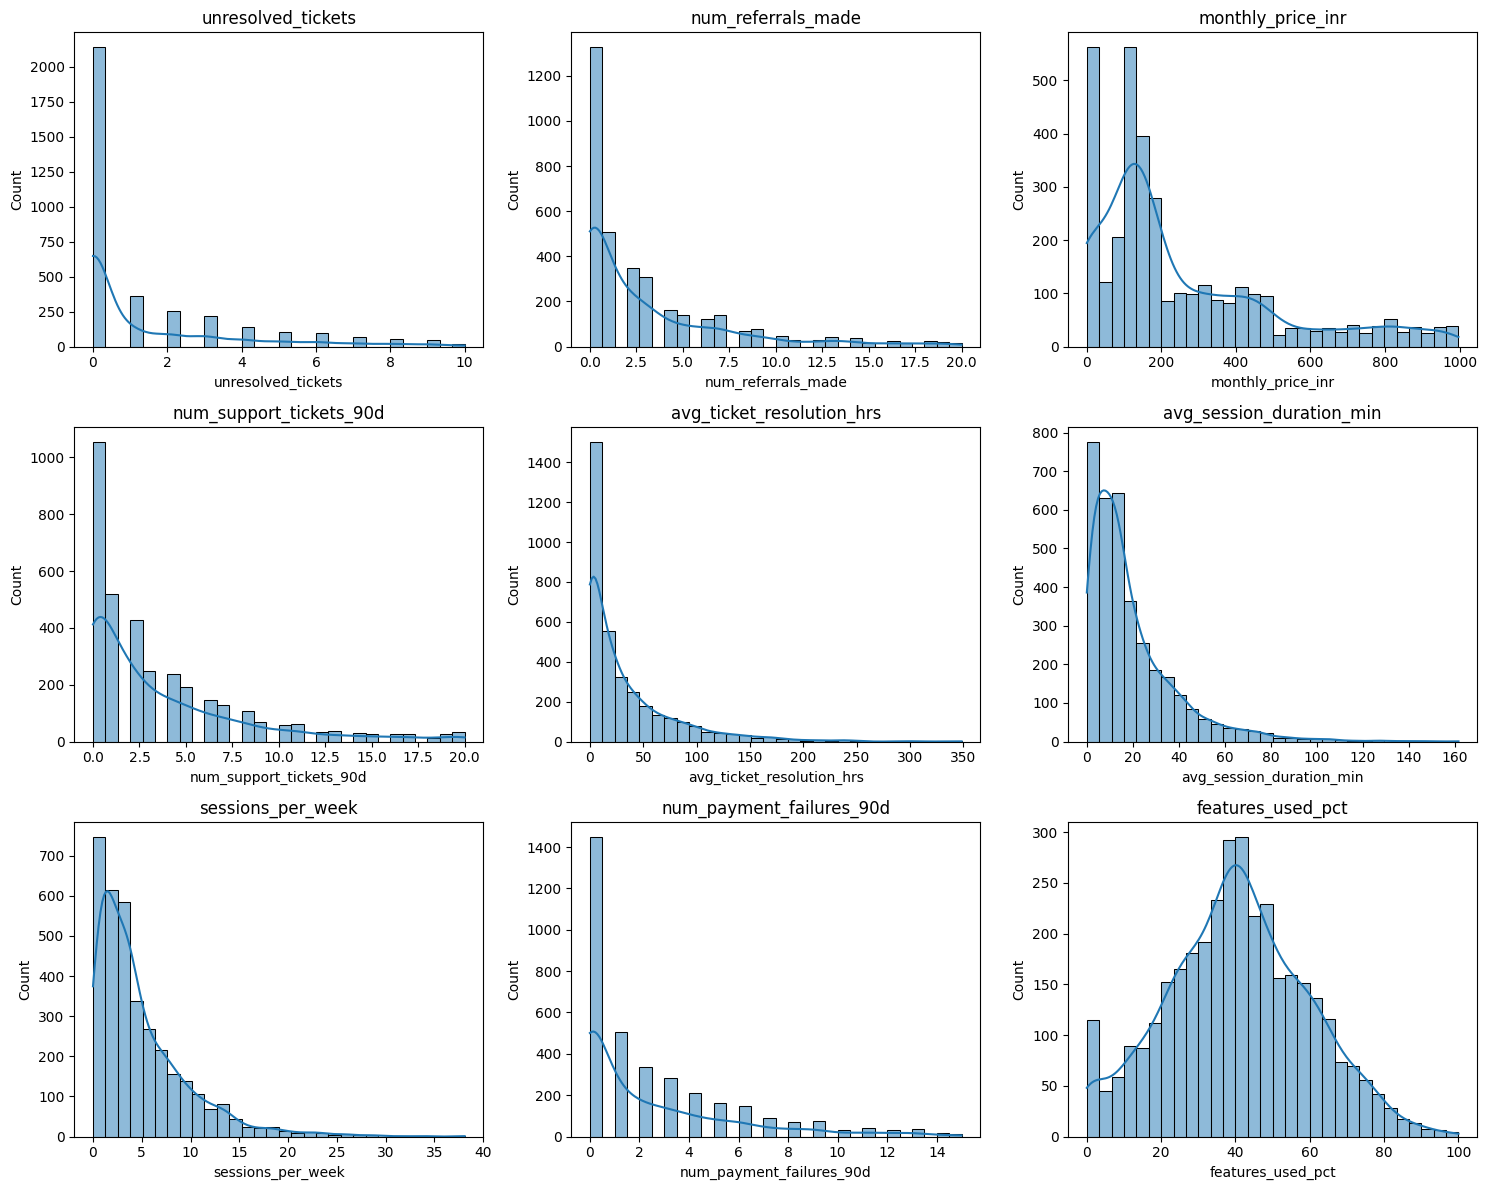

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

cols_to_check = [
    "unresolved_tickets",
    "num_referrals_made",
    "monthly_price_inr",
    "num_support_tickets_90d",
    "avg_ticket_resolution_hrs",
    "avg_session_duration_min",
    "sessions_per_week",
    "num_payment_failures_90d",
    "features_used_pct"
]

n_cols = 3  
n_rows = math.ceil(len(cols_to_check) / n_cols)

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(cols_to_check, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(x[col], bins=30, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [271]:
skewed_cols = [
    "monthly_price_inr",
    "unresolved_tickets",
    "num_referrals_made",
    "num_support_tickets_90d",
    "avg_ticket_resolution_hrs",
    "avg_session_duration_min",
    "sessions_per_week",
    "num_payment_failures_90d"
]

for col in skewed_cols:
    x[col] = np.log1p(x[col])

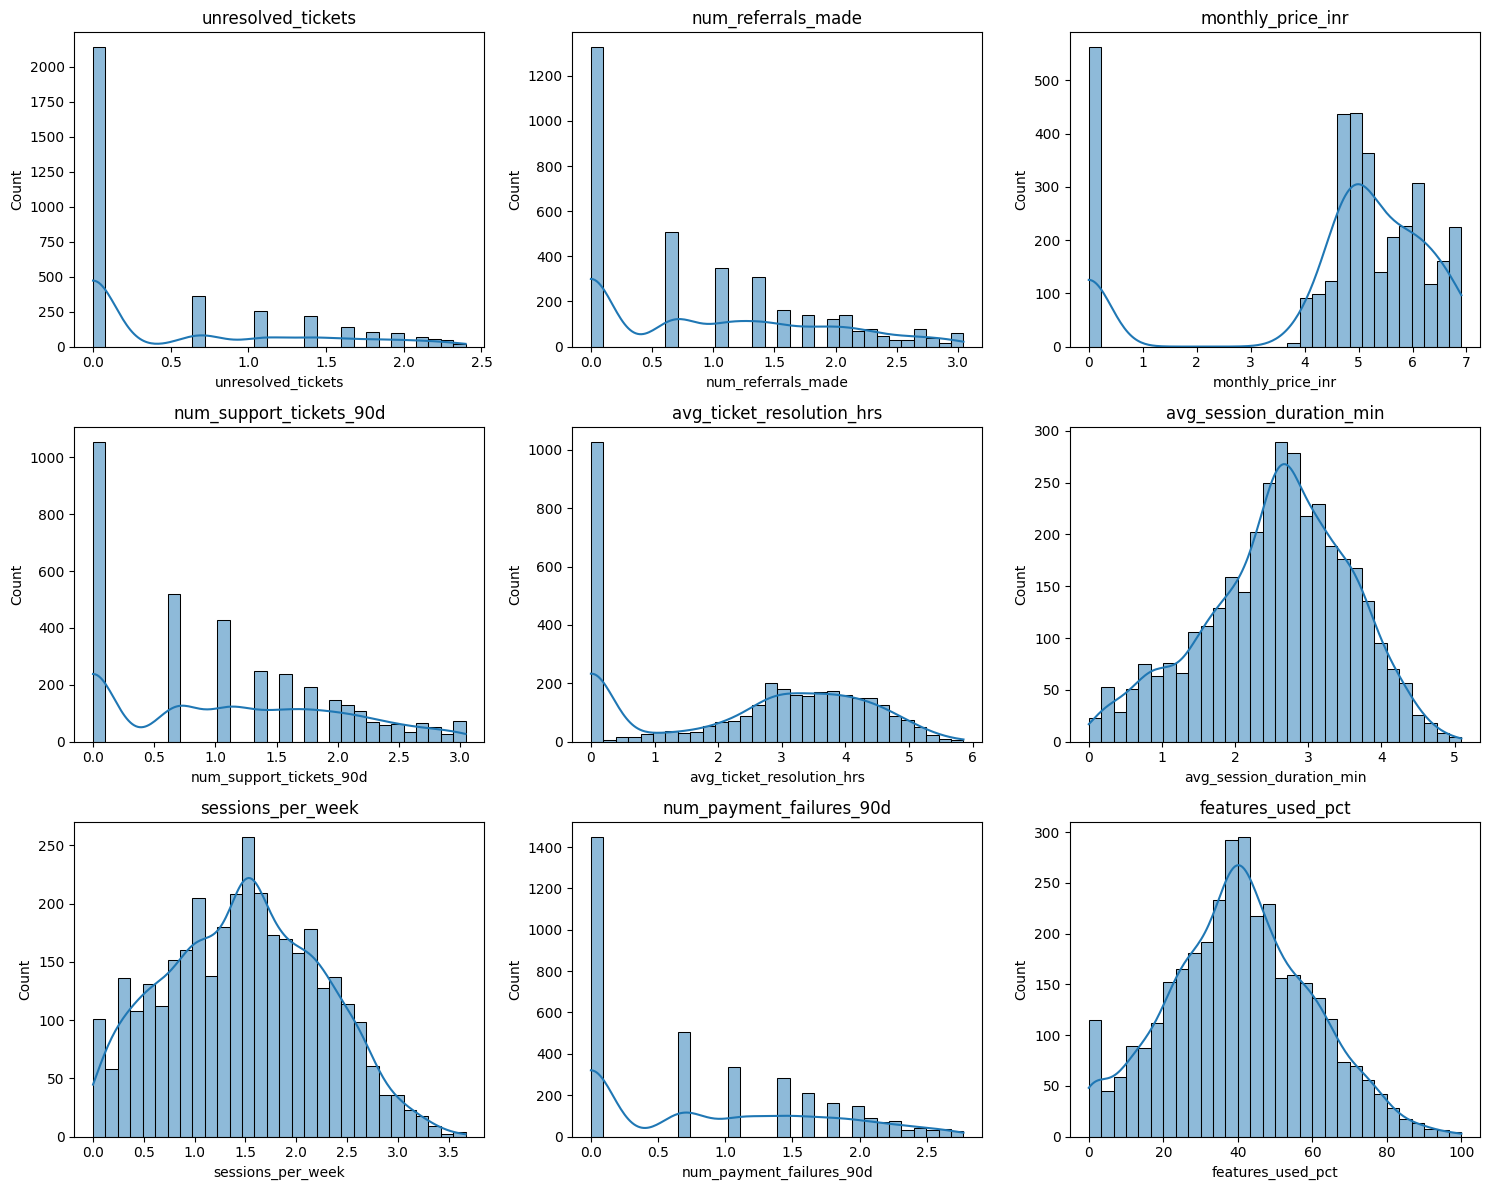

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

cols_to_check = [
    "unresolved_tickets",
    "num_referrals_made",
    "monthly_price_inr",
    "num_support_tickets_90d",
    "avg_ticket_resolution_hrs",
    "avg_session_duration_min",
    "sessions_per_week",
    "num_payment_failures_90d",
    "features_used_pct"
]

n_cols = 3   # number of plots per row
n_rows = math.ceil(len(cols_to_check) / n_cols)

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(cols_to_check, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(x[col], bins=30, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [273]:
rows_with_outliers = outlier_mask.any(axis=1)
print("Outlier rows:", rows_with_outliers.sum())

Outlier rows: 1378


In [274]:
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df[numeric_cols] =df[numeric_cols].clip(lower_bound, upper_bound, axis=1)

In [275]:
x.head()

user_age_group  gender subscription_plan  monthly_price_inr  \
0    middle_aged    male           student           4.330733   
1          adult    male             basic           4.934474   
2    young_adult    male           student           4.948760   
3           teen    male             basic           5.010635   
4    young_adult  female          standard           5.416100   

   subscription_duration_days payment_method  num_payment_failures_90d  \
0                        1235            upi                  1.945910   
1                         465            upi                  1.386294   
2                        1805            upi                  2.197225   
3                        1049     debit_card                  0.693147   
4                         678            upi                  0.693147   

   days_since_last_login  avg_session_duration_min  sessions_per_week  ...  \
0                     27                  3.054001           1.193922  ...   
1                    124                  1.526056           1.902108  ...   
2                     29                  4.234107           1.740466  ...   
3                     76                  2.549445           2.186051  ...   
4                    356                  3.927896           1.308333  ...   

  competitor_app_installed  price_increase_experienced  used_discount_code  \
0                    False                       False               False   
1                    False                        True                True   
2                    False                       False               False   
3                     True                        True                True   
4                     True                       False               False   

        device_type  os_version_age_months  internet_speed_category  \
0       mid_android                   16.0                  fast_4g   
1    budget_android                   27.0              moderate_3g   
2  flagship_android                    4.0              moderate_3g   
3    budget_android                   11.0                  slow_2g   
4      multi_device                   31.0                broadband   

   onboarding_completed  content_category_preference  \
0                 False                    education   
1                 False                entertainment   
2                 False                        mixed   
3                  True                 productivity   
4                 False                      fitness   

   days_since_last_feature_use  notification_opt_in  
0                         68.0                 True  
1                         27.0                False  
2                        323.0                False  
3                        360.0                False  
4                        206.0                 True  

[5 rows x 28 columns]

In [276]:
x.skew(numeric_only=True)

monthly_price_inr             -1.409362
subscription_duration_days     0.010009
num_payment_failures_90d       0.466134
days_since_last_login         -0.040492
avg_session_duration_min      -0.366594
sessions_per_week              0.081189
features_used_pct              0.086335
num_support_tickets_90d        0.266342
avg_ticket_resolution_hrs     -0.227827
unresolved_tickets             1.020449
app_crash_count_30d            0.299430
rating_given                   0.069903
num_referrals_made             0.475758
competitor_app_installed       0.633195
price_increase_experienced     0.864357
used_discount_code             0.379372
os_version_age_months         -0.022280
onboarding_completed          -0.613488
days_since_last_feature_use    0.027262
notification_opt_in           -0.215037
dtype: float64

### ========== Correlation Analysis =========

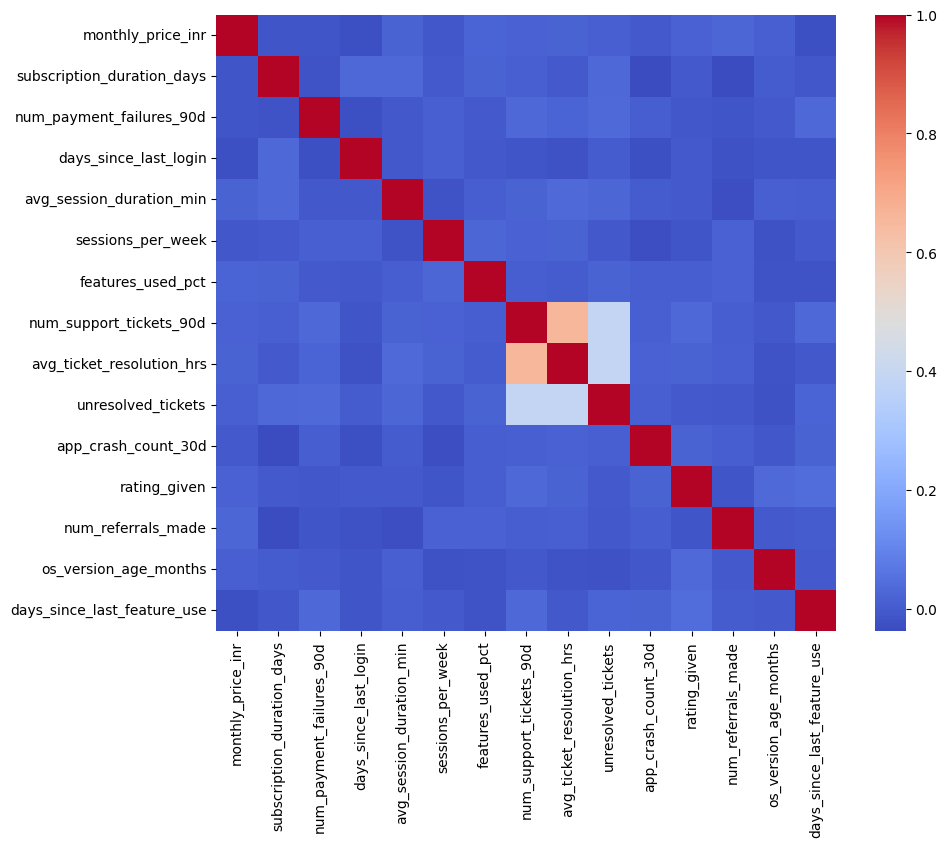

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(x[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.show()

In [278]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_x = x[numeric_cols]

vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_x.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_x.values, i)
                   for i in range(numeric_x.shape[1])]

print(vif_data.sort_values("VIF", ascending=False))

                        Feature       VIF
4      avg_session_duration_min  6.576738
8     avg_ticket_resolution_hrs  5.065504
0             monthly_price_inr  5.023550
6             features_used_pct  4.917610
7       num_support_tickets_90d  4.457649
5             sessions_per_week  4.362493
14  days_since_last_feature_use  3.821455
3         days_since_last_login  3.759448
1    subscription_duration_days  3.734208
13        os_version_age_months  3.670011
11                 rating_given  2.566904
10          app_crash_count_30d  2.220337
12           num_referrals_made  2.026072
2      num_payment_failures_90d  1.956446
9            unresolved_tickets  1.859523


In [279]:
x.drop(columns = ["avg_session_duration_min"], inplace = True)

In [280]:
x.shape

(3500, 27)

In [281]:
nominal_cols = ['user_age_group', 'gender', 'payment_method', 'device_type', 'internet_speed_category', 'content_category_preference']
ordinal_cols = ['subscription_plan', 'session_trend_30d']
numeric_cols = ['monthly_price_inr', 'subscription_duration_days', 'num_payment_failures_90d', 'days_since_last_login', 'sessions_per_week', 'features_used_pct', 'num_support_tickets_90d','avg_ticket_resolution_hrs', 'unresolved_tickets','app_crash_count_30d', 'rating_given', 'num_referrals_made', 'competitor_app_installed', 'price_increase_experienced','used_discount_code', 'os_version_age_months', 'onboarding_completed', 'days_since_last_feature_use',
'notification_opt_in']

In [282]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

ordinal = OrdinalEncoder(
    categories=[["free_trial","student","basic","standard","premium"],
                ["inactive", "declining", "stable", "increasing"]]
)

In [283]:
preprocessor = ColumnTransformer(
    transformers=[
        ("ohe", ohe, nominal_cols),
        ("ord", ordinal, ordinal_cols)
    ],
    remainder="passthrough"
)

In [284]:
x_processed = preprocessor.fit_transform(x)

In [285]:
ohe_cols = preprocessor.named_transformers_["ohe"].get_feature_names_out(nominal_cols)
ord_cols = ordinal_cols

remaining_cols = numeric_cols
all_cols = list(ohe_cols) + ord_cols + remaining_cols

In [286]:
x_processed = pd.DataFrame(x_processed, columns=all_cols)
x_final = x_processed.copy()

In [287]:
x_processed.head()

user_age_group_middle_aged user_age_group_senior user_age_group_teen  \
0                        1.0                   0.0                 0.0   
1                        0.0                   0.0                 0.0   
2                        0.0                   0.0                 0.0   
3                        0.0                   0.0                 1.0   
4                        0.0                   0.0                 0.0   

  user_age_group_young_adult gender_male gender_non_binary gender_undisclosed  \
0                        0.0         1.0               0.0                0.0   
1                        0.0         1.0               0.0                0.0   
2                        1.0         1.0               0.0                0.0   
3                        0.0         1.0               0.0                0.0   
4                        1.0         0.0               0.0                0.0   

  payment_method_debit_card payment_method_net_banking payment_method_upi  \
0                       0.0                        0.0                1.0   
1                       0.0                        0.0                1.0   
2                       0.0                        0.0                1.0   
3                       1.0                        0.0                0.0   
4                       0.0                        0.0                1.0   

   ... app_crash_count_30d rating_given num_referrals_made  \
0  ...                   0          2.0                0.0   
1  ...                   0          0.0                0.0   
2  ...                   0          2.4                0.0   
3  ...                   8          1.4           0.693147   
4  ...                   0          0.0                0.0   

  competitor_app_installed price_increase_experienced used_discount_code  \
0                    False                      False              False   
1                    False                       True               True   
2                    False                      False              False   
3                     True                       True               True   
4                     True                      False              False   

  os_version_age_months onboarding_completed days_since_last_feature_use  \
0                  16.0                False                        68.0   
1                  27.0                False                        27.0   
2                   4.0                False                       323.0   
3                  11.0                 True                       360.0   
4                  31.0                False                       206.0   

  notification_opt_in  
0                True  
1               False  
2               False  
3               False  
4                True  

[5 rows x 48 columns]

In [288]:
x_processed.shape

(3500, 48)

In [289]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_encoded = le.fit_transform(y)

In [290]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'bad_experience': np.int64(0), 'found_alternative': np.int64(1), 'lost_interest': np.int64(2), 'price_sensitive': np.int64(3)}


### =========== Imbalance Check ==========

In [291]:
y.value_counts()

churn_reason
found_alternative    1062
price_sensitive      1001
lost_interest         776
bad_experience        661
Name: count, dtype: int64

In [292]:
1062/661

1.6066565809379727

### =========== Normalization ===========

In [231]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x_scaled = scaler.fit_transform(x_processed)

### =========== Training ===========

In [315]:
## cross validation

from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
import numpy as np

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model = XGBClassifier(
    n_estimators=300,
    max_depth=3,        
    learning_rate=0.05,
    subsample=0.8,            
    colsample_bytree=0.7,
    gamma=0,
    min_child_weight=1,
    reg_alpha=0,
    reg_lambda=2,
    objective="multi:softprob",
    num_class=4,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

scores = cross_val_score(model, x_scaled, y_encoded, cv=kf, scoring="f1_macro")

print("Fold scores:", scores)
print("Mean:", np.mean(scores))

Fold scores: [0.56086113 0.57646562 0.55768977 0.58804114 0.60222694]
Mean: 0.577056922021498


In [233]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

xgb_model = XGBClassifier(
    objective="multi:softprob",   # multiclass
    num_class=4,                  # ← your churn classes
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

In [234]:
param_grid = {
    "n_estimators": [200, 300],
    "max_depth": [3, 4, 6],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.7, 1.0],
    "min_child_weight": [1, 3],
    "gamma": [0, 0.3],
    "reg_alpha": [0, 0.01],
    "reg_lambda": [1, 2]
}

kf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [235]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=kf,
    scoring="f1_macro",   # better than accuracy for multiclass
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_scaled, y_encoded)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


KeyboardInterrupt: 

In [ ]:
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best params: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 0.8}
Best score: 0.577056922021498


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define parameter grid
param_grid = [
    # 🔹 RBF Kernel (most powerful default)
    {
        "kernel": ["rbf"],
        "C": [0.01, 0.1, 1, 10, 50],
        "gamma": ["scale", 0.1, 0.01, 0.001]
    },

    # 🔹 Linear Kernel (fast, good baseline)
    {
        "kernel": ["linear"],
        "C": [0.01, 0.1, 1, 10, 50]
    },

    # 🔹 Polynomial Kernel (complex boundaries)
    {
        "kernel": ["poly"],
        "C": [0.1, 1, 10],
        "degree": [2, 3, 4],
        "gamma": ["scale", 0.1],
        "coef0": [0, 1]
    },

    # 🔹 Sigmoid Kernel (rarely best, but try)
    {
        "kernel": ["sigmoid"],
        "C": [0.1, 1, 10],
        "gamma": ["scale", 0.1],
        "coef0": [0, 1]
    }
]

# Stratified K-Fold (important for classification)
kf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# Grid Search
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=kf,
    scoring="f1_macro",   # better for multiclass
    verbose=1,
    n_jobs=-1
)

# Train
grid_search.fit(x_scaled, y_encoded)

# Results
print("Best Params:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 73 candidates, totalling 365 fits
Best Params: {'C': 50, 'kernel': 'linear'}
Best CV Score: 0.5168913999760777


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    "n_estimators": [100, 200, 400],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}

# Model
rf_model = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

# Stratified CV (important for classification)
kf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# Grid Search
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=kf,
    scoring="f1_macro",   # better for multiclass churn
    verbose=1,
    n_jobs=-1
)

# Train
grid_search.fit(x_scaled, y_encoded)

# Results
print("Best Params:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/Users/akn/Personal/AI_ML/ml/lib/python3.14/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/akn/Personal/AI_ML/ml/lib/python3.14/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/akn/Personal/AI_ML/ml/lib/python3.14/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/akn/Personal/AI_ML/ml/lib/python3.14/site-packag

Best Params: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best CV Score: 0.5431041954193938


In [ ]:
from xgboost import XGBClassifier

final_xgb = XGBClassifier(
    n_estimators=300,
    max_depth=3,        
    learning_rate=0.05,
    subsample=0.8,            
    colsample_bytree=0.7,
    gamma=0,
    min_child_weight=1,
    reg_alpha=0,
    reg_lambda=2,
    objective="multi:softprob",
    num_class=4,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

# Train
final_xgb.fit(x_scaled, y_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1, num_class=4, ...)

In [293]:
test_df = pd.read_csv("test_B.csv")
test_df.head()

id user_age_group       gender subscription_plan  monthly_price_inr  \
0   1    young_adult       female          standard              378.0   
1   2          adult  undisclosed          standard              204.0   
2   3          adult         male          standard              234.0   
3   4          adult       female           student               78.0   
4   5    middle_aged       female           premium              644.0   

   subscription_duration_days payment_method  num_payment_failures_90d  \
0                        1355            upi                         2   
1                        1528    credit_card                         5   
2                         930    credit_card                         0   
3                         986    credit_card                         5   
4                        1338            upi                         0   

   days_since_last_login  avg_session_duration_min  ...  \
0                    138                      15.7  ...   
1                    196                       4.5  ...   
2                    297                      19.1  ...   
3                    100                       8.5  ...   
4                    356                       3.3  ...   

   competitor_app_installed price_increase_experienced  used_discount_code  \
0                      True                      False               False   
1                     False                      False               False   
2                     False                      False               False   
3                     False                       True                True   
4                     False                      False               False   

        device_type  os_version_age_months  internet_speed_category  \
0    budget_android                     53                broadband   
1       mid_android                     50                  fast_4g   
2           desktop                     48                  slow_2g   
3  flagship_android                     59                broadband   
4            iphone                     48              moderate_3g   

   onboarding_completed  content_category_preference  \
0                  True                         news   
1                  True                      fitness   
2                 False                entertainment   
3                 False                 productivity   
4                 False                entertainment   

   days_since_last_feature_use  notification_opt_in  
0                          131                False  
1                          150                 True  
2                          286                 True  
3                            7                 True  
4                          144                False  

[5 rows x 29 columns]

In [294]:
test_df.shape

(600, 29)

In [295]:
test_df.drop(columns=["id"], inplace=True)

In [296]:
skewed_cols = [
    "monthly_price_inr",
    "unresolved_tickets",
    "num_referrals_made",
    "num_support_tickets_90d",
    "avg_ticket_resolution_hrs",
    "avg_session_duration_min",
    "sessions_per_week",
    "num_payment_failures_90d"
]

for col in skewed_cols:
    test_df[col] = np.log1p(test_df[col])

In [297]:
test_df.drop(columns = ["avg_session_duration_min"], inplace = True)

In [298]:
nominal_cols = ['user_age_group', 'gender', 'payment_method', 'device_type', 'internet_speed_category', 'content_category_preference']
ordinal_cols = ['subscription_plan', 'session_trend_30d']
numeric_cols = ['monthly_price_inr', 'subscription_duration_days', 'num_payment_failures_90d', 'days_since_last_login', 'sessions_per_week', 'features_used_pct', 'num_support_tickets_90d','avg_ticket_resolution_hrs', 'unresolved_tickets','app_crash_count_30d', 'rating_given', 'num_referrals_made', 'competitor_app_installed', 'price_increase_experienced','used_discount_code', 'os_version_age_months', 'onboarding_completed', 'days_since_last_feature_use',
'notification_opt_in']

In [299]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

ordinal = OrdinalEncoder(
    categories=[["free_trial","student","basic","standard","premium"],
                ["inactive", "declining", "stable", "increasing"]]
)

In [300]:
preprocessor = ColumnTransformer(
    transformers=[
        ("ohe", ohe, nominal_cols),
        ("ord", ordinal, ordinal_cols)
    ],
    remainder="passthrough"
)

In [301]:
x_processed = preprocessor.fit_transform(x)
test_processed = preprocessor.transform(test_df)

In [302]:
ohe_cols = preprocessor.named_transformers_["ohe"].get_feature_names_out(nominal_cols)
ord_cols = ordinal_cols

remaining_cols = numeric_cols
all_cols = list(ohe_cols) + ord_cols + remaining_cols

In [303]:
test_preocessed = pd.DataFrame(test_processed, columns=all_cols)

In [304]:
test_processed_df = pd.DataFrame(
    test_processed,
    columns=all_cols,
    index=test_df.index
)

test_processed_df.head()

user_age_group_middle_aged user_age_group_senior user_age_group_teen  \
0                        0.0                   0.0                 0.0   
1                        0.0                   0.0                 0.0   
2                        0.0                   0.0                 0.0   
3                        0.0                   0.0                 0.0   
4                        1.0                   0.0                 0.0   

  user_age_group_young_adult gender_male gender_non_binary gender_undisclosed  \
0                        1.0         0.0               0.0                0.0   
1                        0.0         0.0               0.0                1.0   
2                        0.0         1.0               0.0                0.0   
3                        0.0         0.0               0.0                0.0   
4                        0.0         0.0               0.0                0.0   

  payment_method_debit_card payment_method_net_banking payment_method_upi  \
0                       0.0                        0.0                1.0   
1                       0.0                        0.0                0.0   
2                       0.0                        0.0                0.0   
3                       0.0                        0.0                0.0   
4                       0.0                        0.0                1.0   

   ... app_crash_count_30d rating_given num_referrals_made  \
0  ...                  39          1.3           1.609438   
1  ...                  18          4.8                0.0   
2  ...                   0          4.5           0.693147   
3  ...                  48          2.2           1.791759   
4  ...                  48          3.7                0.0   

  competitor_app_installed price_increase_experienced used_discount_code  \
0                     True                      False              False   
1                    False                      False              False   
2                    False                      False              False   
3                    False                       True               True   
4                    False                      False              False   

  os_version_age_months onboarding_completed days_since_last_feature_use  \
0                    53                 True                         131   
1                    50                 True                         150   
2                    48                False                         286   
3                    59                False                           7   
4                    48                False                         144   

  notification_opt_in  
0               False  
1                True  
2                True  
3                True  
4               False  

[5 rows x 48 columns]

In [305]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x_scaled = scaler.fit_transform(x_processed)
test_processed = scaler.transform(test_processed_df)

/Users/akn/Personal/AI_ML/ml/lib/python3.14/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


In [308]:
preds = final_xgb.predict(test_processed)
preds

array([1, 3, 2, 3, 3, 1, 0, 0, 1, 3, 1, 1, 1, 1, 2, 0, 2, 1, 3, 1, 3, 1,
       3, 1, 1, 0, 1, 3, 2, 3, 3, 0, 3, 2, 3, 3, 0, 1, 1, 3, 1, 3, 1, 1,
       1, 3, 1, 2, 3, 1, 1, 1, 2, 3, 3, 3, 1, 1, 0, 3, 3, 0, 0, 1, 3, 2,
       3, 3, 3, 2, 2, 3, 3, 1, 3, 1, 1, 0, 3, 2, 1, 3, 3, 3, 1, 0, 3, 2,
       3, 1, 3, 3, 1, 0, 0, 3, 0, 3, 2, 0, 3, 3, 1, 2, 3, 2, 1, 0, 3, 3,
       3, 3, 1, 1, 1, 3, 3, 0, 1, 1, 3, 1, 0, 3, 3, 1, 1, 1, 3, 1, 2, 2,
       3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 0, 3, 3, 0, 0, 2, 1,
       2, 1, 3, 1, 1, 1, 1, 2, 3, 1, 1, 3, 0, 2, 0, 0, 1, 0, 0, 3, 2, 3,
       0, 2, 1, 3, 1, 3, 1, 1, 3, 1, 3, 0, 3, 1, 0, 2, 2, 0, 2, 3, 0, 2,
       2, 3, 2, 2, 3, 3, 1, 0, 2, 1, 2, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 0,
       0, 3, 2, 1, 3, 3, 3, 0, 1, 1, 1, 3, 2, 3, 2, 2, 3, 1, 3, 3, 1, 2,
       3, 0, 3, 3, 3, 1, 3, 2, 3, 3, 1, 0, 2, 1, 3, 3, 1, 1, 3, 3, 2, 3,
       2, 3, 1, 3, 1, 2, 3, 3, 2, 2, 3, 2, 2, 1, 0, 1, 1, 1, 0, 3, 1, 1,
       1, 1, 1, 2, 3, 3, 1, 1, 1, 2, 1, 2, 1, 0, 1,

In [307]:
import pandas as pd

importance = pd.Series(
    final_xgb.feature_importances_,
    index=x_final.columns
).sort_values(ascending=False)

print(importance)

competitor_app_installed                     0.091327
price_increase_experienced                   0.066284
session_trend_30d                            0.054000
num_payment_failures_90d                     0.050258
unresolved_tickets                           0.041327
subscription_plan                            0.034864
app_crash_count_30d                          0.033814
used_discount_code                           0.033185
notification_opt_in                          0.029703
monthly_price_inr                            0.026637
features_used_pct                            0.024732
num_support_tickets_90d                      0.024637
onboarding_completed                         0.022223
rating_given                                 0.017590
days_since_last_login                        0.016899
days_since_last_feature_use                  0.016735
internet_speed_category_slow_2g              0.016715
num_referrals_made                           0.015839
os_version_age_months       

In [309]:
output_dict = {}
for id, value in enumerate(preds, start=1):
    output_dict[id] = le.inverse_transform([value])[0]

In [310]:
output_dict

{1: 'found_alternative',
 2: 'price_sensitive',
 3: 'lost_interest',
 4: 'price_sensitive',
 5: 'price_sensitive',
 6: 'found_alternative',
 7: 'bad_experience',
 8: 'bad_experience',
 9: 'found_alternative',
 10: 'price_sensitive',
 11: 'found_alternative',
 12: 'found_alternative',
 13: 'found_alternative',
 14: 'found_alternative',
 15: 'lost_interest',
 16: 'bad_experience',
 17: 'lost_interest',
 18: 'found_alternative',
 19: 'price_sensitive',
 20: 'found_alternative',
 21: 'price_sensitive',
 22: 'found_alternative',
 23: 'price_sensitive',
 24: 'found_alternative',
 25: 'found_alternative',
 26: 'bad_experience',
 27: 'found_alternative',
 28: 'price_sensitive',
 29: 'lost_interest',
 30: 'price_sensitive',
 31: 'price_sensitive',
 32: 'bad_experience',
 33: 'price_sensitive',
 34: 'lost_interest',
 35: 'price_sensitive',
 36: 'price_sensitive',
 37: 'bad_experience',
 38: 'found_alternative',
 39: 'found_alternative',
 40: 'price_sensitive',
 41: 'found_alternative',
 42: 'pri

In [312]:
output_df = pd.DataFrame(output_dict.items(), columns=["customer_id", "predicted_label"])
output_df.to_csv("output.csv", index=False)

In [313]:
output_df.head()

customer_id    predicted_label
0            1  found_alternative
1            2    price_sensitive
2            3      lost_interest
3            4    price_sensitive
4            5    price_sensitive